In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

In [45]:
## 데이터 불러오기

In [6]:
data = pd.read_csv('../../DATA/data_in/ChatBotData.csv', encoding='utf-8')

In [46]:
## 문장 세트 만들기

In [8]:
sentences = list(data['Q']) + list(data['A'])

In [47]:
## 토크나이징, 길이 측정 등

In [9]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_emjeol = [len(s.replace(" ", "")) for s in sentences]

In [48]:
## 형태소 분석 (자료가 구어체니까 okt 사용하였음)

In [13]:
okt = Okt()

morph_tokenized_sentences = [okt.morphs(s) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [49]:
## 한글 적을 수 있도록 폰트 선언

In [19]:
plt.rc('font', family='AppleGothic')

In [50]:
## 길이 정보 시각화

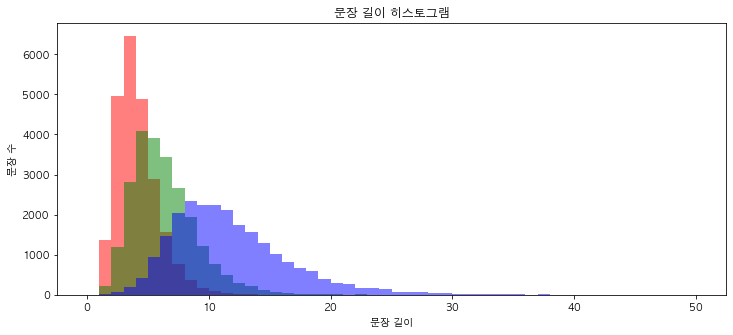

In [22]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='어절')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='형태소')
plt.hist(sent_len_by_emjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='음절')
# plt.yscale('log')
plt.title('문장 길이 히스토그램')
plt.xlabel('문장 길이')
plt.ylabel('문장 수')
plt.show()

In [51]:
## 길이 정보 표기

In [30]:
print('어절 최대 길이 : {}'.format(max(sent_len_by_token)))
print('어절 최소 길이 : {}'.format(min(sent_len_by_token)))
print('어절 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이 : {:.2f}'.format(np.median(sent_len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이 : 21
어절 최소 길이 : 1
어절 평균 길이 : 3.64
어절 길이 표준편차 : 1.74
어절 중간 길이 : 3.00
제 1사분위 길이 : 2.0
제 3사분위 길이 : 5.0


In [31]:
print('형태소 최대 길이 : {}'.format(max(sent_len_by_morph)))
print('형태소 최소 길이 : {}'.format(min(sent_len_by_morph)))
print('형태소 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간 길이 : {:.2f}'.format(np.median(sent_len_by_morph)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_morph, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대 길이 : 31
형태소 최소 길이 : 1
형태소 평균 길이 : 5.83
형태소 길이 표준편차 : 2.71
형태소 중간 길이 : 5.00
제 1사분위 길이 : 4.0
제 3사분위 길이 : 7.0


In [32]:
print('음절 최대 길이 : {}'.format(max(sent_len_by_emjeol)))
print('음절 최소 길이 : {}'.format(min(sent_len_by_emjeol)))
print('음절 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_emjeol)))
print('음절 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_emjeol)))
print('음절 중간 길이 : {:.2f}'.format(np.median(sent_len_by_emjeol)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_emjeol, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sent_len_by_emjeol, 75)))

음절 최대 길이 : 57
음절 최소 길이 : 1
음절 평균 길이 : 11.31
음절 길이 표준편차 : 4.98
음절 중간 길이 : 10.00
제 1사분위 길이 : 8.0
제 3사분위 길이 : 14.0


In [52]:
## 박스플롯 그리기

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8813bf670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd8813bbd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd8813c6e20>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd8813ca070>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8813ce310>,
 'means': [<matplotlib.lines.Line2D at 0x7fd8813ca9a0>,
  <matplotlib.lines.Line2D at 0x7fd89a9001c0>]}

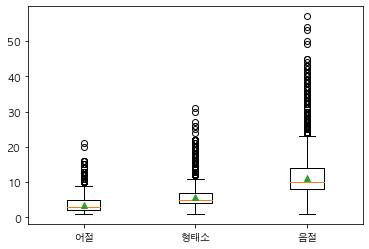

In [37]:
plt.boxplot([sent_len_by_token,sent_len_by_morph,sent_len_by_emjeol], 
           labels=['어절','형태소','음절'], 
          showmeans=True)

In [53]:
## Q와 A 리스트 만들기

In [39]:
query_sentences = data['Q']
answer_sentences = data['A']

query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

In [54]:
## 형태소 분석하여 NVA만 담기

In [42]:
for sent in query_sentences:
    for token, tag in okt.pos(str(sent)):
        if tag in ['Noun', 'Verb', 'Adjective']:
            query_NVA_token_sentences.append(token)
            
for sent in answer_sentences:
    for token, tag in okt.pos(str(sent)):
        if tag in ['Noun', 'Verb', 'Adjective']:
            answer_NVA_token_sentences.append(token)

In [55]:
query_NVA_token_sentences = " ".join(query_NVA_token_sentences)
answer_NVA_token_sentences = " ".join(answer_NVA_token_sentences)

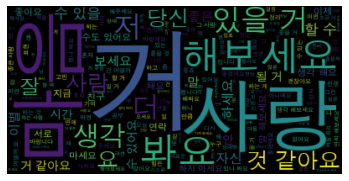

In [62]:
query_wordcloud = WordCloud(font_path='AppleGothic').generate(answer_NVA_token_sentences)
plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()